In [1]:
import sys
import os

# Import necessary components
from train import BoxingDataset, LABEL2ID, ID2LABEL
from transformers import AutoImageProcessor

# Test dataset loading
print("=" * 60)
print("Testing BoxingDataset with Olympic Boxing dataset...")
print("=" * 60)

DATASET_DIR = "Olympic Boxing Punch Classification Video Dataset"
model_name = "MCG-NJU/videomae-base"

print("\n1. Loading image processor...")
image_processor = AutoImageProcessor.from_pretrained(model_name)
print("✓ Image processor loaded successfully")

print("\n2. Creating train dataset...")
train_dataset = BoxingDataset(
    dataset_dir=DATASET_DIR,
    split="train",
    image_processor=image_processor,
)
print(f"✓ Train dataset created with {len(train_dataset)} samples")

 

/usr/local/lib/python3.10/dist-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Testing BoxingDataset with Olympic Boxing dataset...

1. Loading image processor...


Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


✓ Image processor loaded successfully

2. Creating train dataset...
Loaded 3223 samples for train split
Label distribution for train: {'RHMP': 322, 'RHHP': 583, 'RHBP': 121, 'RHBlP': 112, 'LHHP': 1155, 'LHBlP': 273, 'LHMP': 528, 'LHBP': 129}
✓ Train dataset created with 3223 samples


In [ ]:
print("\n3. Creating val dataset...")
val_dataset = BoxingDataset(
    dataset_dir=DATASET_DIR,
    split="val",
    image_processor=image_processor,
)
print(f"✓ Val dataset created with {len(val_dataset)} samples")

print("\n4. Creating test dataset...")
test_dataset = BoxingDataset(
    dataset_dir=DATASET_DIR,
    split="test",
    image_processor=image_processor,
)
print(f"✓ Test dataset created with {len(test_dataset)} samples")



3. Creating val dataset...
Loaded 690 samples for val split
Label distribution for val: {'LHMP': 100, 'RHHP': 135, 'LHHP': 259, 'RHBP': 22, 'RHBlP': 31, 'LHBlP': 49, 'RHMP': 61, 'LHBP': 33}
✓ Val dataset created with 690 samples

4. Creating test dataset...
Loaded 692 samples for test split
Label distribution for test: {'LHHP': 266, 'LHMP': 106, 'RHBlP': 35, 'LHBP': 31, 'RHMP': 65, 'RHBP': 36, 'RHHP': 115, 'LHBlP': 38}
✓ Test dataset created with 692 samples

5. Testing data loading (first sample from train)...


In [ ]:

print("\n5. Testing data loading (first sample from train)...")
sample = train_dataset[0]
print(f"✓ Sample loaded successfully")
print(f"  - pixel_values shape: {sample['pixel_values'].shape}")
print(f"  - label ID: {sample['labels']}")
print(f"  - label name: {ID2LABEL[sample['labels']]}")

print("\n" + "=" * 60)
print("ALL TESTS PASSED! ✓")
print("=" * 60)



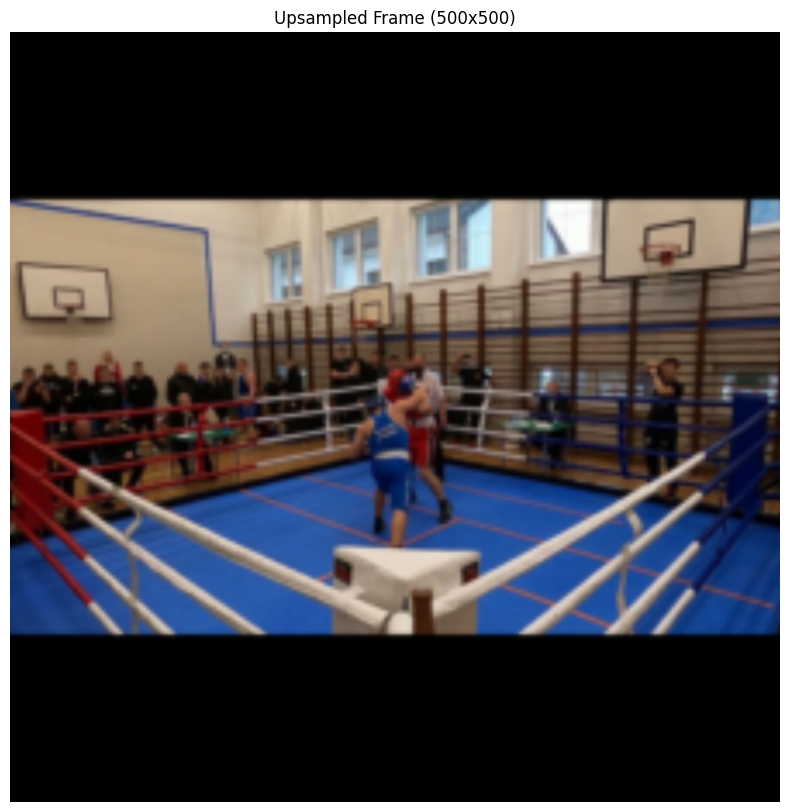

Original clip shape: (16, 224, 224, 3)
Original frame shape: (224, 224, 3)
Upsampled frame shape: (1920, 1920, 3)


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import zoom

# Load a preprocessed clip
clip = np.load('preprocessed_clips/train/RHHP/clip_11.npy')

# Extract the first frame (assuming shape is [frames, height, width, channels] or similar)
frame = clip[8]

# Upsample from 224x224 to 500x500
# Calculate zoom factors for each dimension
zoom_factors = (1920/224, 1920/224, 1) if frame.ndim == 3 else (1920/224, 1920/224)
upsampled_frame = zoom(frame, zoom_factors, order=1)

# Display the frame
plt.figure(figsize=(10, 10))
plt.imshow(upsampled_frame)
plt.title('Upsampled Frame (500x500)')
plt.axis('off')
plt.show()

print(f"Original clip shape: {clip.shape}")
print(f"Original frame shape: {frame.shape}")
print(f"Upsampled frame shape: {upsampled_frame.shape}")

In [3]:
clip.shape

(16, 224, 224, 3)

In [ ]:
import numpy as np
from torch.utils.data import Dataset
import os
import math
import torch
from train import LABEL2ID

# class BoxingDataset(Dataset):
#     mean = np.array([0.485, 0.456, 0.406], dtype=np.float32)
#     std  = np.array([0.229, 0.224, 0.225], dtype=np.float32)
    
#     train_paths = []
#     val_paths = []
#     test_paths = []
#     for label in os.listdir("preprocessed_clips/train/"):
#         paths = (lambda x: [f"preprocessed_clips/train/{x}/{p}" 
#                         for p in os.listdir(f"preprocessed_clips/train/{x}")])(label)
#         paths_count = len(paths)
#         train_ind = math.floor(paths_count * 0.8)
#         val_ind = train_ind + math.floor(paths_count * 0.1)
#         test_ind = val_ind + math.floor(paths_count * 0.1)
#         train_paths.extend(paths[:train_ind])
#         val_paths.extend(paths[train_ind:val_ind])
#         test_paths.extend(paths[val_ind:])
        
#     def __init__(self, split: str):
#         self.split = split
        
        
#     def __len__(self):
#         if self.split == "train":
#             return len(self.train_paths)
#         elif self.split == "val":
#             return len(self.val_paths)
#         elif self.split == "test":
#             return len(self.test_paths)
#         else:
#             raise ValueError(f"Unknown split: {self.split}")

#     def __getitem__(self, idx):
#         if self.split == "train":
#             path = self.train_paths[idx]
#         elif self.split == "val":
#             path = self.val_paths[idx]
#         elif self.split == "test":
#             path = self.test_paths[idx]
#         else:
#             raise ValueError(f"Unknown split: {self.split}")
        
#         clip = np.load(path)
        
#         # convert to float and scale to 0-1
#         clip = clip.astype(np.float32) / 255.0
        
#         # image net mean/std
#         clip = (clip - self.mean) / self.std
        
#         #reorder to (T,C,H,W)
#         clip = clip.transpose(0,3,1,2)
        
#         #convert to tensor
#         clip = torch.from_numpy(clip)
        
#         return {
#             "pixel_values": clip,
#             "labels": torch.tensor(LABEL2ID[path.split("/")[-2]], dtype=torch.long) 
#         }
        


/usr/local/lib/python3.10/dist-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [1]:
from train import BoxingDataset

BoxingDataset("train")[0]       

/usr/local/lib/python3.10/dist-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


{'pixel_values': tensor([[[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
           [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
           [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
           ...,
           [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
           [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
           [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179]],
 
          [[-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
           [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
           [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
           ...,
           [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
           [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
           [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357]],
 
          [[-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044

In [1]:
from train import *
import random
from sklearn.model_selection import train_test_split
import re
from collections import Counter

def split_data():
    train_paths = []
    val_paths = []
    test_paths = []

    # Collect all paths with their labels and sources
    all_paths = []
    all_labels = []
    all_sources = []

    for label in os.listdir("preprocessed_clips_3"):
        paths = [f"preprocessed_clips_3/{label}/{p}" for p in os.listdir(f"preprocessed_clips_3/{label}")]
        
        for path in paths:
            # Extract source from filename: pattern is clip_task_[kamx_nums]_index_c.npy
            # Source is the part matching task_[kamx_nums]_index_c (everything from task_ to .npy)
            filename = os.path.basename(path)
            # Match task_ followed by any characters until .npy
            source_match = re.search(r'task_kam\d+_[^_]+', filename)
            if source_match:
                source = source_match.group(0)
            else:
                # Fallback: use filename without extension as source
                source = os.path.splitext(filename)[0]
            
            all_paths.append(path)
            all_labels.append(label)
            all_sources.append(source)

    # Create combined stratification key: label_source
    # This ensures both label and source distributions are maintained
    stratify_key = [f"{label}_{source}" for label, source in zip(all_labels, all_sources)]


    # First split: 80% train, 20% temp (which will become val+test)
    train_paths, temp_paths, train_labels, temp_labels, train_sources, temp_sources = train_test_split(
        all_paths, all_labels, all_sources,
        test_size=0.2,
        stratify=stratify_key,
        random_state=632
    )

    # Second split: split temp into 50% val, 50% test (which gives 10% val, 10% test overall)
    # Create new stratification key for temp split
    temp_stratify_key = [f"{label}_{source}" for label, source in zip(temp_labels, temp_sources)]

    temp_counts = Counter(temp_stratify_key)
    min_count = min(temp_counts.values())

    if min_count >= 2:
        val_paths, test_paths, val_labels, test_labels, val_sources, test_sources = train_test_split(
            temp_paths, temp_labels, temp_sources,
            test_size=0.5,
            stratify=temp_stratify_key,
            random_state=42
        )
    else:
        # Fall back to non-stratified split if some classes have < 2 members
        val_paths, test_paths, val_labels, test_labels, val_sources, test_sources = train_test_split(
            temp_paths, temp_labels, temp_sources,
            test_size=0.5,
            stratify=None,
            random_state=632
        )

    # Convert to class variables
    train_paths = train_paths
    val_paths = val_paths
    test_paths = test_paths
    
    return train_paths, val_paths, test_paths

class BoxingDataset(Dataset):
    mean = np.array([0.485, 0.456, 0.406], dtype=np.float32)
    std  = np.array([0.229, 0.224, 0.225], dtype=np.float32)
    
    all_splits = split_data()
    train_paths = all_splits[0]
    val_paths = all_splits[1]
    test_paths = all_splits[2]

        
        
    def __init__(self, split: str):
        self.split = split
        
        
    def __len__(self):
        if self.split == "train":
            return len(self.train_paths)
        elif self.split == "val":
            return len(self.val_paths)
        elif self.split == "test":
            return len(self.test_paths)
        else:
            raise ValueError(f"Unknown split: {self.split}")

    def __getitem__(self, idx):
        if self.split == "train":
            path = self.train_paths[idx]
        elif self.split == "val":
            path = self.val_paths[idx]
        elif self.split == "test":
            path = self.test_paths[idx]
        else:
            raise ValueError(f"Unknown split: {self.split}")
        
        clip = np.load(path)
        
        # convert to float and scale to 0-1
        clip = clip.astype(np.float32) / 255.0
        
        # image net mean/std
        clip = (clip - self.mean) / self.std
        
        #reorder to (T,C,H,W)
        clip = clip.transpose(0,3,1,2)
        
        #convert to tensor
        clip = torch.from_numpy(clip)
        
        return {
            "pixel_values": clip,
            "labels": torch.tensor(LABEL2ID[path.split("/")[-2]], dtype=torch.long) 
        }




from collections import defaultdict
paths = BoxingDataset.train_paths
label_counts = defaultdict(int)
for path in paths:
    label = path.split("/")[-2]
    label_counts[label] += 1

print(dict(label_counts))



/usr/local/lib/python3.10/dist-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


{'LHHP': 7005, 'RHMP': 2004, 'RHBP': 727, 'RHHP': 3486, 'LHBlP': 1546, 'LHMP': 3373, 'RHBlP': 738, 'LHBP': 761}


In [26]:
paths = BoxingDataset.train_paths
from collections import defaultdict

label_counts = defaultdict(int)
for path in paths:
    label = path.split("/")[-2]
    label_counts[label] += 1

print(dict(label_counts))



{'RHBP': 143, 'LHBP': 154, 'RHHP': 666, 'RHBlP': 142, 'LHMP': 587, 'LHBlP': 288, 'RHMP': 359, 'LHHP': 1344}


In [27]:
import numpy as np
# from a npy clip, generate a video
path = paths[-101]
label = path.split("/")[-2]
clip = np.load(path)

clip.shape
label

'LHHP'

In [10]:
import av
import numpy as np

def numpy_to_video_av_upsampled_native(clip: np.ndarray, output_path: str,
                                       target_size: tuple = (1920, 1920),
                                       fps: int = 8):
    """
    Convert numpy array to video with upsampling using av's native resizer.
    
    Args:
        clip: numpy array of shape (T, H, W, 3) with values in [0, 255] (uint8)
        output_path: path to save video file
        target_size: (width, height) tuple for output resolution
        fps: frames per second
    """
    # Ensure uint8
    if clip.dtype != np.uint8:
        clip = np.clip(clip, 0, 255).astype(np.uint8)
    
    T, H, W, C = clip.shape
    target_w, target_h = target_size
    
    # Create output container
    container = av.open(output_path, mode='w')
    stream = container.add_stream('libx264', rate=fps)
    stream.width = target_w
    stream.height = target_h
    stream.pix_fmt = 'yuv420p'
    
    # Write frames
    for frame_idx in range(T):
        # Create frame from original size
        frame = av.VideoFrame.from_ndarray(clip[frame_idx], format='rgb24')
        
        # Resize using av's resizer
        frame = frame.reformat(width=target_w, height=target_h)
        
        for packet in stream.encode(frame):
            container.mux(packet)
    
    # Flush encoder
    for packet in stream.encode():
        container.mux(packet)
    
    container.close()
    print(f"Video saved to {output_path} at {target_w}x{target_h}")

# Usage:
# numpy_to_video_av_upsampled_native(clip, "output.mp4", target_size=(1920, 1920))

In [29]:
#import counter 
from collections import Counter
from collections import Counter
print("Train:", Counter([p.split("/")[-2] for p in BoxingDataset.train_paths]))
print("Val:",   Counter([p.split("/")[-2] for p in BoxingDataset.val_paths]))
print("Test:",  Counter([p.split("/")[-2] for p in BoxingDataset.test_paths]))


Train: Counter({'LHHP': 1344, 'RHHP': 666, 'LHMP': 587, 'RHMP': 359, 'LHBlP': 288, 'LHBP': 154, 'RHBP': 143, 'RHBlP': 142})
Val: Counter({'LHHP': 168, 'RHHP': 83, 'LHMP': 73, 'RHMP': 44, 'LHBlP': 36, 'LHBP': 19, 'RHBP': 17, 'RHBlP': 17})
Test: Counter({'LHHP': 169, 'RHHP': 84, 'LHMP': 74, 'RHMP': 46, 'LHBlP': 36, 'LHBP': 20, 'RHBP': 19, 'RHBlP': 19})


In [40]:
import os
import random
for p in os.listdir("preprocessed_clips/train/"):
    label_paths = os.listdir(f"preprocessed_clips/train/{p}")
    # random sample 2 of them
    sample_paths = random.sample(label_paths, 2)
    for path in sample_paths:
        clip = np.load(f"preprocessed_clips/train/{p}/{path}")
        numpy_to_video_av_upsampled_native(clip, f"clips/{p}-{path.split('.')[0]}.mp4", target_size=(1920, 1920))

Video saved to clips/RHBP-clip_2908.mp4 at 1920x1920
Video saved to clips/RHBP-clip_4506.mp4 at 1920x1920
Video saved to clips/LHBP-clip_459.mp4 at 1920x1920
Video saved to clips/LHBP-clip_871.mp4 at 1920x1920
Video saved to clips/RHHP-clip_434.mp4 at 1920x1920
Video saved to clips/RHHP-clip_2545.mp4 at 1920x1920
Video saved to clips/RHBlP-clip_1063.mp4 at 1920x1920
Video saved to clips/RHBlP-clip_1203.mp4 at 1920x1920
Video saved to clips/LHMP-clip_2710.mp4 at 1920x1920
Video saved to clips/LHMP-clip_2056.mp4 at 1920x1920
Video saved to clips/LHBlP-clip_856.mp4 at 1920x1920
Video saved to clips/LHBlP-clip_2188.mp4 at 1920x1920
Video saved to clips/RHMP-clip_3670.mp4 at 1920x1920
Video saved to clips/RHMP-clip_2424.mp4 at 1920x1920
Video saved to clips/LHHP-clip_902.mp4 at 1920x1920
Video saved to clips/LHHP-clip_783.mp4 at 1920x1920


In [3]:
clip = np.load("/workspace/facts/preprocessed_clips_2/RHMP/clip_task_kam4_gh159681_9496_0.npy")
numpy_to_video_av_upsampled_native(clip, "newnew.mp4", target_size=(1920, 1920))


Video saved to newnew.mp4 at 1920x1920


In [ ]:
from train import *
import random
class BoxingDataset(Dataset):
    mean = np.array([0.485, 0.456, 0.406], dtype=np.float32)
    std  = np.array([0.229, 0.224, 0.225], dtype=np.float32)
    
    train_paths = []
    val_paths = []
    test_paths = []
    for label in os.listdir("preprocessed_clips_2"):
        paths = (lambda x: [f"preprocessed_clips_2/{x}/{p}" for p in os.listdir(f"preprocessed_clips_2/{x}")])(label)
        random.shuffle(paths)
        paths_count = len(paths)
        train_ind = math.floor(paths_count * 0.8)
        val_ind = train_ind + math.floor(paths_count * 0.1)
        test_ind = val_ind + math.floor(paths_count * 0.1)
        train_paths.extend(paths[:train_ind])
        val_paths.extend(paths[train_ind:val_ind])
        test_paths.extend(paths[val_ind:])
        
        
        
    def __init__(self, split: str):
        self.split = split
        
        
    def __len__(self):
        if self.split == "train":
            return len(self.train_paths)
        elif self.split == "val":
            return len(self.val_paths)
        elif self.split == "test":
            return len(self.test_paths)
        else:
            raise ValueError(f"Unknown split: {self.split}")

    def __getitem__(self, idx):
        if self.split == "train":
            path = self.train_paths[idx]
        elif self.split == "val":
            path = self.val_paths[idx]
        elif self.split == "test":
            path = self.test_paths[idx]
        else:
            raise ValueError(f"Unknown split: {self.split}")
        
        clip = np.load(path)
        
        # convert to float and scale to 0-1
        clip = clip.astype(np.float32) / 255.0
        
        # image net mean/std
        clip = (clip - self.mean) / self.std
        
        #reorder to (T,C,H,W)
        clip = clip.transpose(0,3,1,2)
        
        #convert to tensor
        clip = torch.from_numpy(clip)
        
        return {
            "pixel_values": clip,
            "labels": torch.tensor(LABEL2ID[path.split("/")[-2]], dtype=torch.long) 
        }

BoxingDataset.train_paths[0]


'preprocessed_clips_2/RHBP/clip_task_kam2_gh118416_10123_1.npy'

In [15]:
len(BoxingDataset.val_paths)

742

Grid video saved to grid_vids/train_LHHP_grid.mp4 (1160x1160, 16 frames, 25 clips_LHHP)
Grid video saved to grid_vids/train_LHHP_grid.mp4 (1160x1160, 16 frames, 25 clips_LHHP)
Grid video saved to grid_vids/train_RHHP_grid.mp4 (1160x1160, 16 frames, 25 clips_RHHP)
Grid video saved to grid_vids/train_LHMP_grid.mp4 (1160x1160, 16 frames, 25 clips_LHMP)
Grid video saved to grid_vids/train_RHMP_grid.mp4 (1160x1160, 16 frames, 25 clips_RHMP)
Grid video saved to grid_vids/train_LHBlP_grid.mp4 (1160x1160, 16 frames, 25 clips_LHBlP)
Grid video saved to grid_vids/train_RHBlP_grid.mp4 (1160x1160, 16 frames, 25 clips_RHBlP)
Grid video saved to grid_vids/train_LHBP_grid.mp4 (1160x1160, 16 frames, 25 clips_LHBP)
Grid video saved to grid_vids/train_RHBP_grid.mp4 (1160x1160, 16 frames, 25 clips_RHBP)
Grid video saved to grid_vids/val_LHHP_grid.mp4 (1160x1160, 16 frames, 25 clips_LHHP)
Grid video saved to grid_vids/val_RHHP_grid.mp4 (1160x1160, 16 frames, 25 clips_RHHP)
Grid video saved to grid_vids/va

In [56]:
from sklearn.model_selection import train_test_split
import re
from collections import Counter

def split_data():
    train_paths = []
    val_paths = []
    test_paths = []

    # Collect all paths with their labels and sources
    all_paths = []
    all_labels = []
    all_sources = []

    for label in os.listdir("preprocessed_clips_2"):
        paths = [f"preprocessed_clips_2/{label}/{p}" for p in os.listdir(f"preprocessed_clips_2/{label}")]
        
        for path in paths:
            # Extract source from filename: pattern is clip_task_[kamx_nums]_index_c.npy
            # Source is the part matching task_[kamx_nums]_index_c (everything from task_ to .npy)
            filename = os.path.basename(path)
            # Match task_ followed by any characters until .npy
            source_match = re.search(r'task_kam\d+_[^_]+', filename)
            if source_match:
                source = source_match.group(0)
            else:
                # Fallback: use filename without extension as source
                source = os.path.splitext(filename)[0]
            
            all_paths.append(path)
            all_labels.append(label)
            all_sources.append(source)

    # Create combined stratification key: label_source
    # This ensures both label and source distributions are maintained
    stratify_key = [f"{label}_{source}" for label, source in zip(all_labels, all_sources)]


    # First split: 80% train, 20% temp (which will become val+test)
    train_paths, temp_paths, train_labels, temp_labels, train_sources, temp_sources = train_test_split(
        all_paths, all_labels, all_sources,
        test_size=0.2,
        stratify=stratify_key,
        random_state=632
    )

    # Second split: split temp into 50% val, 50% test (which gives 10% val, 10% test overall)
    # Create new stratification key for temp split
    temp_stratify_key = [f"{label}_{source}" for label, source in zip(temp_labels, temp_sources)]

    temp_counts = Counter(temp_stratify_key)
    min_count = min(temp_counts.values())

    if min_count >= 2:
        val_paths, test_paths, val_labels, test_labels, val_sources, test_sources = train_test_split(
            temp_paths, temp_labels, temp_sources,
            test_size=0.5,
            stratify=temp_stratify_key,
            random_state=42
        )
    else:
        # Fall back to non-stratified split if some classes have < 2 members
        val_paths, test_paths, val_labels, test_labels, val_sources, test_sources = train_test_split(
            temp_paths, temp_labels, temp_sources,
            test_size=0.5,
            stratify=None,
            random_state=632
        )

    # Convert to class variables
    train_paths = train_paths
    val_paths = val_paths
    test_paths = test_paths
    
    return train_paths, val_paths, test_paths


In [57]:
from train import *
import random
class BoxingDataset(Dataset):
    mean = np.array([0.485, 0.456, 0.406], dtype=np.float32)
    std  = np.array([0.229, 0.224, 0.225], dtype=np.float32)
    
    all_splits = split_data()
    train_paths = all_splits[0]
    val_paths = all_splits[1]
    test_paths = all_splits[2]

        
        
    def __init__(self, split: str):
        self.split = split
        
        
    def __len__(self):
        if self.split == "train":
            return len(self.train_paths)
        elif self.split == "val":
            return len(self.val_paths)
        elif self.split == "test":
            return len(self.test_paths)
        else:
            raise ValueError(f"Unknown split: {self.split}")

    def __getitem__(self, idx):
        if self.split == "train":
            path = self.train_paths[idx]
        elif self.split == "val":
            path = self.val_paths[idx]
        elif self.split == "test":
            path = self.test_paths[idx]
        else:
            raise ValueError(f"Unknown split: {self.split}")
        
        clip = np.load(path)
        
        # convert to float and scale to 0-1
        clip = clip.astype(np.float32) / 255.0
        
        # image net mean/std
        clip = (clip - self.mean) / self.std
        
        #reorder to (T,C,H,W)
        clip = clip.transpose(0,3,1,2)
        
        #convert to tensor
        clip = torch.from_numpy(clip)
        
        return {
            "pixel_values": clip,
            "labels": torch.tensor(LABEL2ID[path.split("/")[-2]], dtype=torch.long) 
        }



In [58]:

def create_grid_video(split: str, output_path: str, label: str = None, 
                     fps: int = 8, margin: int = 10):
    """
    Create a 5x5 grid video from equally distributed samples in the dataset.
    
    Args:
        split: "train", "val", or "test"
        output_path: path to save the output video
        label: optional label to filter by (e.g., "LHHP", "RHHP"). If None, uses all labels.
        fps: frames per second for output video
        margin: pixel margin between grid cells
    """
    # Get the appropriate paths
    if split == "train":
        paths = BoxingDataset.train_paths
    elif split == "val":
        paths = BoxingDataset.val_paths
    elif split == "test":
        paths = BoxingDataset.test_paths
    else:
        raise ValueError(f"Unknown split: {split}")
    
    # Filter by label if provided
    if label is not None:
        paths = [p for p in paths if p.split("/")[-2] == label]
        if len(paths) == 0:
            raise ValueError(f"No paths found for label '{label}' in split '{split}'")
    
    # Select 25 videos equally distributed across the filtered dataset
    num_videos = 25  # 5x5 grid
    num_total = len(paths)
    if num_total < num_videos:
        print(f"Warning: Only {num_total} videos available, using all of them")
        selected_paths = paths
        grid_size = int(np.ceil(np.sqrt(num_total)))
    else:
        indices = np.linspace(0, num_total - 1, num_videos, dtype=int)
        selected_paths = [paths[i] for i in indices]
        grid_size = 5
    
    # Load all clips
    clips = []
    for path in selected_paths:
        clip = np.load(path)  # Shape: (16, 224, 224, 3)
        # Ensure uint8 format
        if clip.dtype != np.uint8:
            clip = np.clip(clip, 0, 255).astype(np.uint8)
        clips.append(clip)
    
    # Get dimensions
    T, H, W, C = clips[0].shape  # T=16, H=224, W=224, C=3
    cell_h, cell_w = H, W  # 224x224
    
    # Calculate output dimensions with margins
    # Each cell: 224x224, plus margins between cells
    # For grid_size x grid_size: (grid_size * cell_size) + ((grid_size - 1) * margin)
    output_h = grid_size * cell_h + (grid_size - 1) * margin
    output_w = grid_size * cell_w + (grid_size - 1) * margin
    
    # Create output container
    os.makedirs(os.path.dirname(output_path), exist_ok=True)
    container = av.open(output_path, mode='w')
    stream = container.add_stream('libx264', rate=fps)
    stream.width = output_w
    stream.height = output_h
    stream.pix_fmt = 'yuv420p'
    
    # Create grid for each frame
    for frame_idx in range(T):
        # Create empty canvas for this frame (white background)
        grid_frame = np.ones((output_h, output_w, C), dtype=np.uint8) * 255
        
        # Place each clip's frame in the grid
        for grid_idx, clip in enumerate(clips):
            row = grid_idx // grid_size
            col = grid_idx % grid_size
            
            # Position in output frame (accounting for margins)
            y_start = row * (cell_h + margin)
            y_end = y_start + cell_h
            x_start = col * (cell_w + margin)
            x_end = x_start + cell_w
            
            # Place the frame
            grid_frame[y_start:y_end, x_start:x_end] = clip[frame_idx]
        
        # Convert to av.VideoFrame and encode
        frame = av.VideoFrame.from_ndarray(grid_frame, format='rgb24')
        for packet in stream.encode(frame):
            container.mux(packet)
    
    # Flush encoder
    for packet in stream.encode():
        container.mux(packet)
    
    container.close()
    label_str = f"_{label}" if label else ""
    print(f"Grid video saved to {output_path} ({output_w}x{output_h}, {T} frames, {len(clips)} clips{label_str})")

# Usage examples:
# All labels:
# create_grid_video("train", "train_grid.mp4")
# create_grid_video("val", "val_grid.mp4")
# create_grid_video("test", "test_grid.mp4")

# Specific label:
create_grid_video("train", "grid_vids/train_LHHP_grid.mp4", label="LHHP")
# create_grid_video("val", "val_RHHP_grid.mp4", label="RHHP")
# create_grid_video("test", "test_LHMP_grid.mp4", label="LHMP")

for split in ["train", "val", "test"]:
    for label in LABEL2ID.keys():
        create_grid_video(split, f"shuffled_grid_vids/{split}_{label}_grid.mp4", label=label)



Grid video saved to grid_vids/train_LHHP_grid.mp4 (1160x1160, 16 frames, 25 clips_LHHP)
Grid video saved to shuffled_grid_vids/train_LHHP_grid.mp4 (1160x1160, 16 frames, 25 clips_LHHP)
Grid video saved to shuffled_grid_vids/train_RHHP_grid.mp4 (1160x1160, 16 frames, 25 clips_RHHP)
Grid video saved to shuffled_grid_vids/train_LHMP_grid.mp4 (1160x1160, 16 frames, 25 clips_LHMP)
Grid video saved to shuffled_grid_vids/train_RHMP_grid.mp4 (1160x1160, 16 frames, 25 clips_RHMP)
Grid video saved to shuffled_grid_vids/train_LHBlP_grid.mp4 (1160x1160, 16 frames, 25 clips_LHBlP)
Grid video saved to shuffled_grid_vids/train_RHBlP_grid.mp4 (1160x1160, 16 frames, 25 clips_RHBlP)
Grid video saved to shuffled_grid_vids/train_LHBP_grid.mp4 (1160x1160, 16 frames, 25 clips_LHBP)
Grid video saved to shuffled_grid_vids/train_RHBP_grid.mp4 (1160x1160, 16 frames, 25 clips_RHBP)
Grid video saved to shuffled_grid_vids/val_LHHP_grid.mp4 (1160x1160, 16 frames, 25 clips_LHHP)
Grid video saved to shuffled_grid_vid